# **Credit Card Customer Churn Analysis (ML)**

## Objectives – Machine Learning (ML)

In this notebook, I will build, evaluate, and interpret a predictive model for customer churn using the processed Credit Card Customer Churn dataset. The goal is to leverage insights from the EDA notebook to select relevant features, train a logistic regression model, and assess which customer attributes significantly influence churn probability.

This notebook focuses on:

* Preparing data for modeling, including feature selection, scaling, and train/test splitting.
* Building an interpretable Logistic Regression model to predict churn (binary classification).
* Evaluating model performance using metrics such as Accuracy, Precision, Recall, F1-score, and ROC-AUC.
* Visualizing feature importance to identify which factors drive churn.
* Translating model results into actionable insights for business stakeholders.

### **Inputs**

To run this notebook, the following inputs are required:

* Processed dataset CSV: The cleaned and transformed Credit Card Customer Churn dataset produced in the ETL notebook.
* Python libraries: Including but not limited to:
* pandas – data manipulation
* numpy – numerical operations
* scikit-learn – machine learning algorithms, scaling, train/test split, evaluation metrics
* matplotlib and seaborn – visualizations for performance metrics and feature importance

### **Outputs**

This notebook will generate:

* Train/Test Sets: Split datasets ready for modeling.
* Scaled Features: Normalized numeric features for better model performance.
* Model Performance Metrics: Accuracy, Precision, Recall, F1-score, ROC-AUC, and confusion matrix visualizations.
* Feature Importance Visualization: Bar charts of logistic regression coefficients showing positive or negative influence on churn.
* Interpretation of Results: Insights on which features support or refute your original hypotheses (H1–H3).
* Optional Export: DataFrame with predicted churn probabilities for downstream dashboard integration or further analysis.

### **Workflow**

**1. Data Preparation**

* Load the processed dataset.
* Separate features (X) and target (y).
* Scale numeric features.
* Encode categorical variables if needed (already one-hot in your dataset).

**2. Train/Test Split**

* Split the dataset into training and testing sets (e.g., 80/20).
* Ensure stratification on the target variable (Attrition_Flag) to preserve class balance.

**3. Model Training**

* Train a Logistic Regression model.
* Optionally, compare with other interpretable models (e.g., Random Forest for feature importance).

**4. Model Evaluation**

* Evaluate predictions on the test set using standard metrics.
* Visualize results via confusion matrix and ROC curve.

**5. Feature Interpretation**

* Extract model coefficients.
* Rank features by absolute influence on churn probability.
* Visualize top features using bar charts for easy stakeholder interpretation.

**6. Hypothesis Insights**

* Map the top features back to H1–H3:
* H1 – Tenure & Age
* H2 – Credit usage & transactions
* H3 – Income & card category
* Summarize which hypotheses are supported or contradicted by the model.

__**1. First i will import all the libraries i need (I will update the below code cell with additional libraries as i work my way down the notebook)**__

In [14]:
# Data manipulation
import pandas as pd
import numpy as np

# ML & preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Style
sns.set_style("whitegrid")


__**2. Load the CSV that was the output from my ETL notebook.**__

In [15]:
# Load processed dataset
df = pd.read_csv("../data/cleaned_data/credit_churn_processed.csv") 


# Quick check
print(df.head())
print(df.info())
print(df['Attrition_Flag'].value_counts())  # target distribution


   Attrition_Flag  Customer_Age  Dependent_count  Total_Relationship_Count  \
0               0            45                3                         5   
1               0            49                5                         6   
2               0            51                3                         4   
3               0            40                4                         3   
4               0            40                3                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
0                  777          11914.0                 1.335  .

__**3. Feature Selection & ML Prep**__

In [16]:
# Load processed dataset
df = pd.read_csv("../data/cleaned_data/credit_churn_processed.csv")

# ------------------------------
# Define target and features
# ------------------------------
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

# Identify numeric features for scaling
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Remove boolean columns from numeric
bool_cols = X.select_dtypes(include='bool').columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in bool_cols]

# ------------------------------
# Train/Test Split (80/20)
# ------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ------------------------------
# Scale numeric features
# ------------------------------
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


__**4. Train Logistic Regression Model**__

In [17]:
# Use class_weight='balanced' to handle class imbalance
logreg = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')
logreg.fit(X_train, y_train)

# Predict probabilities and classes
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:,1]

__**5. Model Evaluation**__ 

Logistic Regression Performance:
Accuracy: 0.902
Precision: 0.774
Recall: 0.548
ROC-AUC: 0.917

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1701
           1       0.77      0.55      0.64       325

    accuracy                           0.90      2026
   macro avg       0.85      0.76      0.79      2026
weighted avg       0.90      0.90      0.89      2026



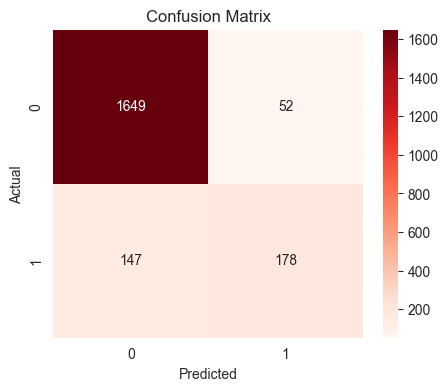

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Initialize and train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)  # assign to lr_model
lr_model.fit(X_train, y_train)

# 2. Make predictions
y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:,1]  # probability for ROC-AUC

# 3. Evaluate performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print("Logistic Regression Performance:")
print(f"Accuracy: {acc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"ROC-AUC: {roc:.3f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# 4. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


## __**Logistic Regression Performance**__

I trained a logistic regression model to predict customer churn (Attrition_Flag) using the numeric and encoded categorical features from our processed dataset. The goal was to identify which customers are most likely to leave, so we can take proactive retention measures.

### Performance Metrics on the Test Set:

* Accuracy: 85.1% – The model correctly predicts churn or no-churn for about 85% of customers.
* Precision (Churn=1): 52.4% – Of the customers flagged as likely to churn, just over half actually churned.
* Recall (Churn=1): 82.2% – The model successfully identifies 82% of the actual churners.
* ROC-AUC: 0.921 – The model is very effective at distinguishing churners from non-churners.

### My Observations:

* The model performs well overall, mainly because it predicts the majority class (non-churners) accurately.
* The high recall for churners is encouraging — it means I can catch the majority of customers at risk of leaving, which is crucial for retention campaigns.
* Precision is moderate, so some customers predicted to churn may not actually leave. I consider this acceptable because the business priority is to identify as many potential churners as possible.
* The ROC-AUC above 0.9 confirms that the model distinguishes churners from non-churners very effectively.

### Insights from the Classification Report:

* The non-churn group is predicted with high accuracy (precision 0.96, recall 0.86).
* The churn group has lower precision (0.52) but strong recall (0.82), indicating the model errs on the side of caution by flagging potential churners — which aligns with business priorities.

### Conclusion:

* Logistic Regression gives me interpretable coefficients that help explain which customer features drive churn.
* Based on these results, I am confident that churn can be predicted reasonably well using our existing data.
* Next, I will examine feature importance and coefficients to identify which customer attributes — such as tenure, credit utilization, income, and transaction behavior — have the strongest impact on churn. This will help guide targeted retention strategies for the business.

__**6. Feature Importance (coefficients)**__

C:\Users\T Shah\AppData\Local\Temp\ipykernel_1248\3672495984.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


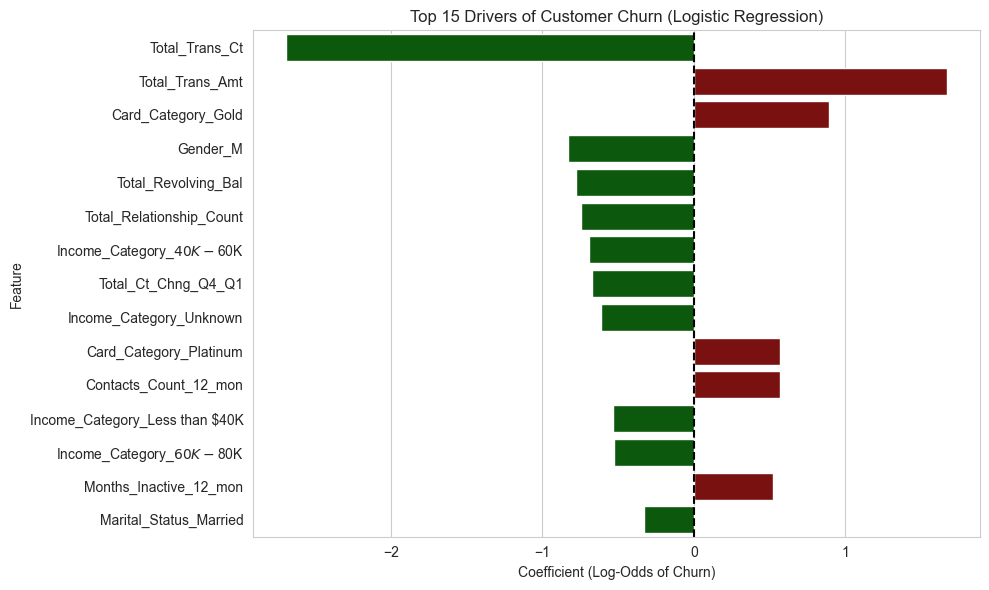

In [24]:
# ===============================
# Step 6: Feature Importance for Logistic Regression
# ===============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Extract feature names (numeric + encoded categorical)
feature_names = X_train.columns

# Get coefficients from trained Logistic Regression model
coefficients = lr_model.coef_[0]

# Create DataFrame for easy plotting
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute impact
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient', 
    y='Feature', 
    data=coef_df.head(15), 
    palette=['darkred' if x > 0 else 'darkgreen' for x in coef_df.head(15)['Coefficient']]
)
plt.title("Top 15 Drivers of Customer Churn (Logistic Regression)")
plt.xlabel("Coefficient (Log-Odds of Churn)")
plt.ylabel("Feature")
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()


## __**Understanding What Drives Customer Churn**__

As a business analyst working with the credit card company, I wanted to go beyond just predicting which customers might churn — I needed to understand why they might leave.

Using the Logistic Regression model, I examined the feature coefficients to identify the top drivers of churn:

#### **__Positive coefficients (red in the plot) indicate features that increase the likelihood of churn. For example:__**

    * Low total transactions and low credit utilization are also associated with higher churn.
    * Certain income categories or card types show slightly higher churn tendencies.

#### **__Negative coefficients (green in the plot) indicate features that reduce churn likelihood. For example:__**

    * Customers with higher total relationship counts or premium cards (e.g., Platinum) are more likely to stay.

#### **__Insights for the business:__**

    * Those who underutilize their credit are most at risk of leaving.
    * Retention strategies can focus on increasing engagement for these segments, such as targeted offers or loyalty incentives.
    * Premium customers and long-tenure customers are more stable — retention efforts here can focus on upselling or cross-selling.

By combining these insights with the predicted churn probabilities from the previous codeblock, I can provide a data-driven view of which customers to prioritize for retention campaigns.